# Домашнее задание 5. Линейные модели

In [1]:
import random as pr
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import sklearn.cross_validation as cv
import sklearn.metrics as sm

# Plotting config
%pylab inline

/home/stroykova/.local/lib/python2.7/site-packages/sklearn/utils/sparsetools/__init__.py:3: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._min_spanning_tree import minimum_spanning_tree
/home/stroykova/.local/lib/python2.7/site-packages/sklearn/utils/sparsetools/_graph_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._graph_tools import csgraph_to_dense, csgraph_from_dense,\
/home/stroykova/.local/lib/python2.7/site-packages/sklearn/utils/sparsetools/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._traversal import connected_components
/usr/lib/python2.7/dist-packages/scipy/spatial/__init__.py:90: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .ckdtree import *
/usr/lib/python2.7/dist-packages/scipy/spatial/__init__.py:91: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  fr

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/dist-packages/scipy/stats/stats.py:252: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from ._rank import rankdata, tiecorrect
/home/stroykova/.local/lib/python2.7/site-packages/sklearn/metrics/cluster/supervised.py:18: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .expected_mutual_info_fast import expected_mutual_information
/home/stroykova/.local/lib/python2.7/site-packages/sklearn/metrics/pairwise.py:56: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .pairwise_fast import _chi2_kernel_fast, _sparse_manhattan


Зачитываем результат 4 домашки

In [2]:
data = np.load("files/out_4.dat.npz")
users = data["users"]
X = data["data"].reshape(1,)[0]

Зачитываем категории пользователей

In [5]:
TRAINING_SET_URL = "twitter_train.csv"
df_users = pd.read_csv(TRAINING_SET_URL, sep=",", header=0, names=["twitter_id", "is_1", "is_2", "is_3"], dtype={"twitter_id": str, "is_1": int, 'is_2': int, "is_3": int})
df_users.set_index("twitter_id", inplace=True)

Формируем целевую переменную: Делаем join списка пользователей из ДЗ4 с обучающей выборкой. (Этого бы не пришлось делать, если бы мы в 4 домашке сохранили целевую -- надо учесть на будущее).

In [6]:
Y_1 = df_users.ix[users.astype(str)]["is_1"].values
Y_2 = df_users.ix[users.astype(str)]["is_2"].values
Y_3 = df_users.ix[users.astype(str)]["is_3"].values
print "Resulting training set for 1 class: (%dx%d) feature matrix, %d target vector" % (X.shape[0], X.shape[1], Y_1.shape[0])
print "Resulting training set for 2 class: (%dx%d) feature matrix, %d target vector" % (X.shape[0], X.shape[1], Y_2.shape[0])
print "Resulting training set for 3 class: (%dx%d) feature matrix, %d target vector" % (X.shape[0], X.shape[1], Y_3.shape[0])

Resulting training set for 1 class: (3001x70832) feature matrix, 3001 target vector
Resulting training set for 2 class: (3001x70832) feature matrix, 3001 target vector
Resulting training set for 3 class: (3001x70832) feature matrix, 3001 target vector


Чтобы исследовать, как ведут себя признаки, построим распределение количества ненулевых признаков у пользователей, чтобы убедиться, что он удовлетворяет закону Ципфа.

[     0     21     26 ..., 838524 838525 838526]
[21  5  1 ...,  2  1  1]
70832
70832
[    0 42339  7844 ...,     0     0     1]


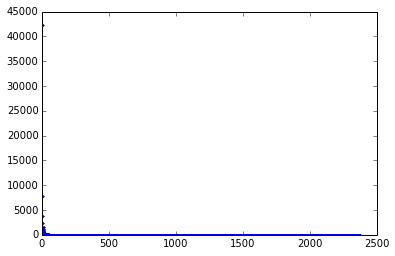

In [31]:
col_counts = np.diff(X.tocsc().indptr)
print X.tocsc().indptr
print col_counts
print len(col_counts)
print X.shape[1]
bin_counts = np.bincount(col_counts)
print bin_counts
pl.plot(np.arange(bin_counts.shape[0]), bin_counts, ".")
ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

Проведем отбор признаков. В самом простом случае просто удаляем признаки, имеющие ненулевое значение у менее, чем 100 пользователей.

In [8]:
X1 = X.tocsc()[:, col_counts > 100].toarray()

Вариант задания генерируется на основании вашего ника в техносфере.

In [9]:
USER_NAME = "n.anokhin"
OPTIMIZATION_ALGORITHMS = ["stochastic gradient descent", "Newton method"]
REGULARIZATIONS = ["L1", "L2"]

print "My homework 5 algorithm is: Logistic regression with %s regularization optimized by %s" % (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    OPTIMIZATION_ALGORITHMS[hash(USER_NAME[::-1]) % 2]
)

My homework 5 algorithm is: Logistic regression with L2 regularization optimized by Newton method


Реализуем выбранный алгоритм

In [10]:
class LogisticRegression():
    
    def fit(self, X, Y=None):
        return self
    
    def predict_proba(self, X):
        import numpy.random as nr
        return nr.random((X.shape[0], 2))

Реализуем метрику качества, используемую в соревновании: площадь под ROC кривой

In [11]:
def auroc(y_prob, y_true):
    return 0.5

Разделим выборку с помощью методики кросс-валидации для того, чтобы настроить параметр регуляризации $C$

In [12]:
C = [0.0, 0.01, 0.1, 1, 10, 100, 1000, 10000]
skf = cv.StratifiedKFold(Y_1, len(C))
for i, (train, test) in enumerate(skf):
    X_train, Y_train = X1[train], Y_1[train]
    X_test, Y_test = X1[test], Y_1[test]
    model = LogisticRegression().fit(X_train, Y_train)
    print i, auroc(model.predict_proba(X_test)[:, 0], Y_test)

0 0.5
1 0.5
2 0.5
3 0.5
4 0.5
5 0.5
6 0.5
7 0.5


/home/stroykova/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:413: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=8.
  % (min_labels, self.n_folds)), Warning)


Выбираем наилучшее значение $C$, и классифицируем неизвестных пользователей и строим ROC-кривую

[ 1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.
  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.
  1.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.
  0.  1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  1.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  1.  0.
  1.  0.  0.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  1.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  1.  1.  1.  1.  1.
  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  1.
  1.  0.  1.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  1.  1.
  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.
  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.  0

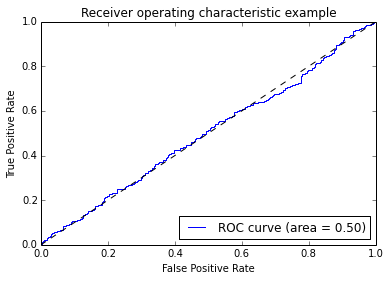

In [16]:
X_train, X_test, Y_train, Y_test = cv.train_test_split(X1, Y_1, test_size=0.3)
Y_prob = LogisticRegression().fit(X_train, Y_train).predict_proba(X_test)
fpr, tpr, thresholds = sm.roc_curve(Y_test, Y_prob[:, 1])
roc_auc = sm.auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

С помощью полученной модели предсказываем категории для неизвестных пользователей из соревнования и загружаем на kaggle в нужном формате.

0 0.5
1 0.5
2 0.5
3 0.5
4 0.5
5 0.5
6 0.5
7 0.5
Area under the ROC curve : 0.464777


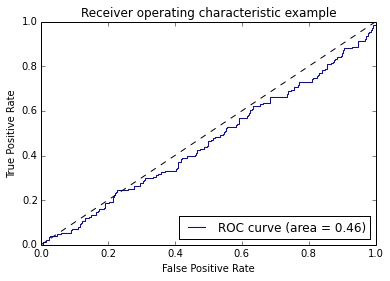

In [17]:
C = [0.0, 0.01, 0.1, 1, 10, 100, 1000, 10000]
skf = cv.StratifiedKFold(Y_2, len(C))
for i, (train, test) in enumerate(skf):
    X_train, Y_train = X1[train], Y_2[train]
    X_test, Y_test = X1[test], Y_2[test]
    model = LogisticRegression().fit(X_train, Y_train)
    print i, auroc(model.predict_proba(X_test)[:, 0], Y_test)
    
X_train, X_test, Y_train, Y_test = cv.train_test_split(X1, Y_2, test_size=0.3)
Y_prob = LogisticRegression().fit(X_train, Y_train).predict_proba(X_test)
fpr, tpr, thresholds = sm.roc_curve(Y_test, Y_prob[:, 1])
roc_auc = sm.auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

0 0.5
1 0.5
2 0.5
3 0.5
4 0.5
5 0.5
6 0.5
7 0.5
Area under the ROC curve : 0.494275


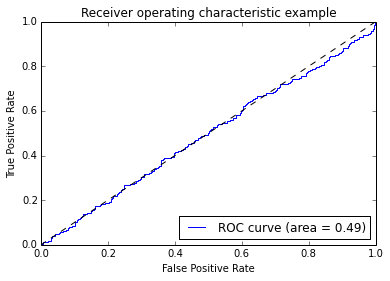

In [18]:
C = [0.0, 0.01, 0.1, 1, 10, 100, 1000, 10000]
skf = cv.StratifiedKFold(Y_3, len(C))
for i, (train, test) in enumerate(skf):
    X_train, Y_train = X1[train], Y_3[train]
    X_test, Y_test = X1[test], Y_3[test]
    model = LogisticRegression().fit(X_train, Y_train)
    print i, auroc(model.predict_proba(X_test)[:, 0], Y_test)


X_train, X_test, Y_train, Y_test = cv.train_test_split(X1, Y_3, test_size=0.3)
Y_prob = LogisticRegression().fit(X_train, Y_train).predict_proba(X_test)
fpr, tpr, thresholds = sm.roc_curve(Y_test, Y_prob[:, 1])
roc_auc = sm.auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()